# 1. Riesgo de accidente cerebrovascular y habitos de vida

### Importando librerias

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Leyendo csv

In [36]:
df=pd.read_csv('/home/renso/Downloads/healthcare-dataset-stroke-data.csv')

### Seleccionando columnas

In [38]:
columnas = ['smoking_status', 'work_type', 'bmi']
column_select = df[columnas].copy()

### Calculando la media

In [48]:
medias = column_select.groupby(['smoking_status', 'work_type'])['bmi'].mean().reset_index()
### la funcion groupby junta las columnas elegidas y hace combinaciones unicas. Luego la funcion mean saca el promedio
### de esas combinaciones y reset_index convierte el resultado en un DataFrame normal.
print(medias)

     smoking_status      work_type        bmi
0           Unknown       Govt_job  29.852586
1           Unknown   Never_worked  22.037500
2           Unknown        Private  29.886393
3           Unknown  Self-employed  29.545205
4           Unknown       children  19.700995
5   formerly smoked       Govt_job  31.315079
6   formerly smoked        Private  30.919721
7   formerly smoked  Self-employed  30.586294
8   formerly smoked       children  20.208333
9      never smoked       Govt_job  30.281455
10     never smoked   Never_worked  27.550000
11     never smoked        Private  30.171537
12     never smoked  Self-employed  30.197799
13     never smoked       children  23.655556
14           smokes       Govt_job  30.910619
15           smokes        Private  30.511024
16           smokes  Self-employed  30.457895
17           smokes       children  22.950000


### Gráfico de barras (barplot) que muestra la media de la variable elegida por combinación de smoking_status y work_type.

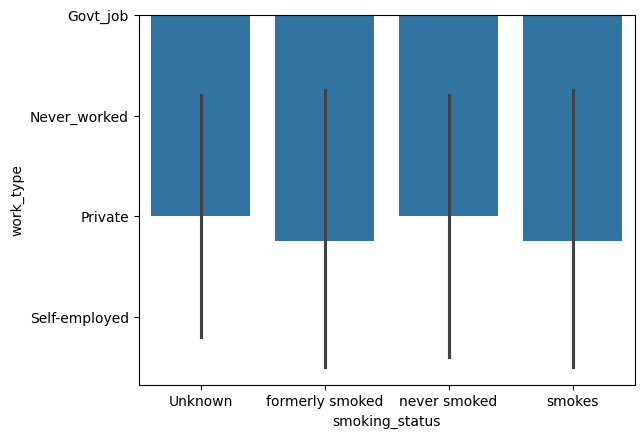

In [69]:
barra = sns.barplot(medias, x='smoking_status', y='work_type')
### La funcion barplot toma como parametros la variable elegida (los valores), un eje x, un eje y. En este caso, x es smoking_status,
### por otro lado, y es work_type.

#### Heatmap que muestra las medias, con smoking_status en un eje y work_type en el otro.

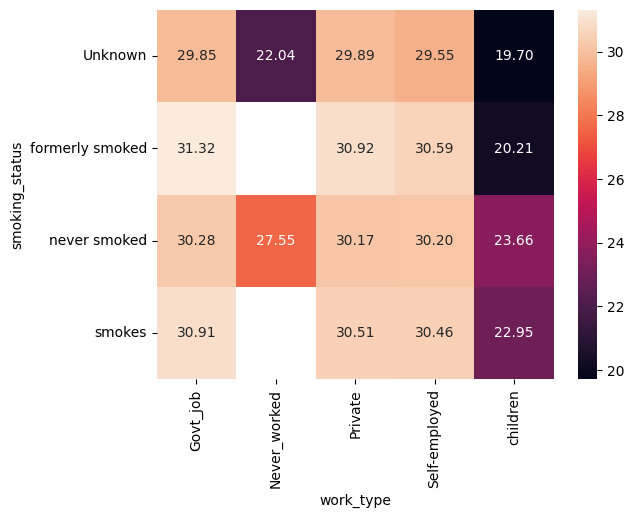

In [72]:
heat = medias.pivot(index="smoking_status", columns="work_type", values='bmi')
sns.heatmap(heat, annot=True, fmt='.2f')
plt.show()

### Se crea una variable llamada heat, la cual contiene el data frame medias junto con la funcion pivot. Esta funcion
### toma dos atributos, en este caso smoking_status, work_type y los convierte a un formato ancho. El parametro values toma la variable
### elegida, en este caso es bmi.

### la funcion heatmap, toma la variable heat, el parametro annot muestra los valores numéricos dentro de cada celda del heatmap y .fmt
### controla el formato de los números que se muestran cuando se usa annot=True.

### Comente cuál de los dos gráficos le resulta más claro para comparar los grupos y por qué, tomando en cuenta el público objetivo del análisis (por ejemplo, personal médico o de salud pública).

#### El grafico mas claro resulta ser el segundo (heatmap), ya que por la representacion de numeros, como se muestra cada eje con su respectivo valor y la barra de la derecha donde muestra que tono de color es correspondiente a cada valor del BMI, es mas facil de entender la informacion de manera rapida.

# 2. Intención de compra en comercio electrónico

### Leyendo csv

In [3]:
df_ecommerce=pd.read_csv('/home/renso/Downloads/online_shoppers_intention.csv')

#### Variable numérica PageValues y boxplot que compara la misma entre las sesiones con Revenue = True y Revenue = False

In [11]:
figura = plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

In [12]:
data_true=df_ecommerce[df_ecommerce['Revenue'] == True]['PageValues']
data_false=df_ecommerce[df_ecommerce['Revenue'] == False]['PageValues']

<function matplotlib.pyplot.show(close=None, block=None)>

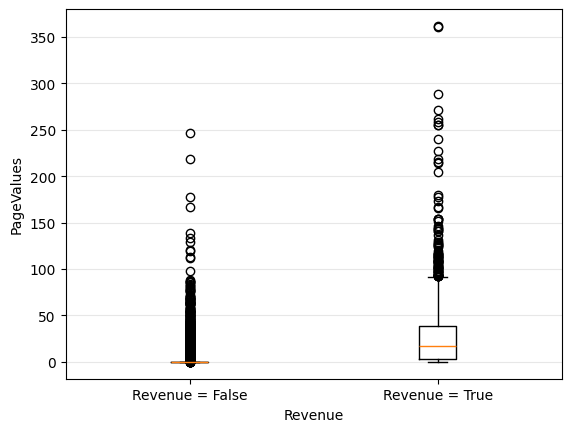

In [13]:
plt.boxplot([data_false, data_true], tick_labels=['Revenue = False', 'Revenue = True'])
plt.ylabel('PageValues')
plt.xlabel('Revenue')
plt.grid(axis='y', alpha=0.3)
plt.show

### Con la misma variable numérica (PageValues) y Revenue en el eje categórico violin plot

/tmp/ipykernel_2400/128838282.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_ecommerce,x='Revenue',y='PageValues',palette=['blue','red'])


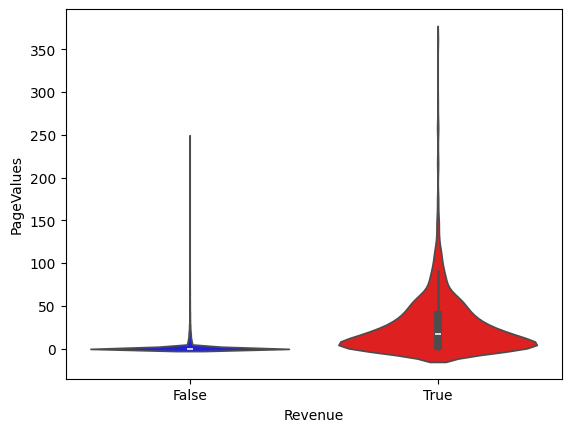

In [15]:
sns.violinplot(data=df_ecommerce,x='Revenue',y='PageValues',palette=['blue','red'])
plt.xlabel('Revenue')
plt.ylabel('PageValues')
plt.show()

### Explique qué aporta cada tipo de gráfico para entender el comportamiento de la variable numérica con respecto a si el usuario termina o no en compra. Discuta qué tipo de usuario luce más “valioso” según la distribución observada

#### En el caso del grafico de boxplot, si el revenue true esta mas arriba que el de false, lo cual es asi, quiere decir que los usuarios que compran tienen PageValues mas altos. Esto dice que los PageValues podrian ser un buen predictor de compra. A simple vista no es tan sencillo de ver, por ende, no es tan eficiente como otros graficos.

#### Por otro lado, en el caso del grafico de violinplot, el revenue true tiene un violin ancho en valores bajos, esto quiere decir que la mayoria de los usuarios sin compra tienen PageValues bajos. Este grafico es mas legible de manera mas facil.


# 4. Propiedades físico-químicas y calidad del vino

### Leyendo csv

In [16]:
df_wine=pd.read_csv('/home/renso/Downloads/WineQT.csv')

In [17]:
variables=['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'alcohol', 'quality']

In [20]:
df_vinos=df_wine[variables]
print(df_vinos)

      fixed acidity  volatile acidity  residual sugar    pH  alcohol  quality
0               7.4             0.700             1.9  3.51      9.4        5
1               7.8             0.880             2.6  3.20      9.8        5
2               7.8             0.760             2.3  3.26      9.8        5
3              11.2             0.280             1.9  3.16      9.8        6
4               7.4             0.700             1.9  3.51      9.4        5
...             ...               ...             ...   ...      ...      ...
1138            6.3             0.510             2.3  3.42     11.0        6
1139            6.8             0.620             1.9  3.42      9.5        6
1140            6.2             0.600             2.0  3.45     10.5        5
1141            5.9             0.550             2.2  3.52     11.2        6
1142            5.9             0.645             2.0  3.57     10.2        5

[1143 rows x 6 columns]


In [22]:
matriz = df_vinos.corr()
print(matriz)

                  fixed acidity  volatile acidity  residual sugar        pH  \
fixed acidity          1.000000         -0.250728        0.171831 -0.685163   
volatile acidity      -0.250728          1.000000       -0.005751  0.221492   
residual sugar         0.171831         -0.005751        1.000000 -0.116959   
pH                    -0.685163          0.221492       -0.116959  1.000000   
alcohol               -0.075055         -0.203909        0.058421  0.225322   
quality                0.121970         -0.407394        0.022002 -0.052453   

                   alcohol   quality  
fixed acidity    -0.075055  0.121970  
volatile acidity -0.203909 -0.407394  
residual sugar    0.058421  0.022002  
pH                0.225322 -0.052453  
alcohol           1.000000  0.484866  
quality           0.484866  1.000000  


In [25]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

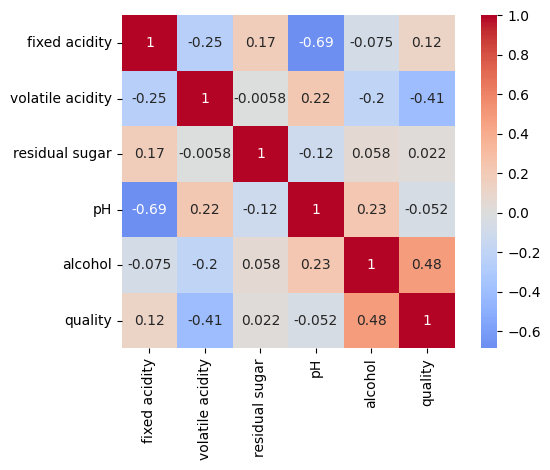

In [26]:
sns.heatmap(matriz,annot=True,cmap='coolwarm',center=0,square=True)
plt.tight_layout()
plt.show()

### Comente al menos dos relaciones interesantes (positivas o negativas) entre las propiedades químicas del vino y su calidad. Indique qué variables parecen más influyentes en una mejor calidad según las correlaciones observadas

In [28]:
correlaciones_quality = matriz['quality'].sort_values(ascending=False)
print(correlaciones_quality)

quality             1.000000
alcohol             0.484866
fixed acidity       0.121970
residual sugar      0.022002
pH                 -0.052453
volatile acidity   -0.407394
Name: quality, dtype: float64


#### ALCOHOL - Correlación positiva moderada (r = 0.485)
#### El contenido de alcohol es la variable con mayor correlación positiva con la calidad del vino. Existe una relación moderada donde a mayor graduación alcohólica, mayor tiende a ser la calidad percibida.

####  VOLATILE ACIDITY - Correlación negativa moderada (r = -0.407)
#### La acidez volátil muestra la correlación negativa más fuerte con la calidad, siendo la variable más influyente de forma negativa. A mayor acidez volátil, menor es la calidad del vino.

#### Positivamente (mejoran la calidad):

#### Alcohol (r = 0.485) - Influencia moderada positiva

#### Mayor contenido alcohólico → Mayor calidad


#### Fixed Acidity (r = 0.122) - Influencia débil positiva

#### Niveles adecuados de acidez fija → Ligera mejora en calidad


#### Residual Sugar (r = 0.022) - Influencia despreciable

#### Prácticamente sin efecto directo